# Customer Churn Predicition

## Import The Neccessary Libraries First

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

## We Should Load the data first

In [2]:
!pip install xlrd
df = pd.read_excel("Churn_Modelling.xls")
df


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0
10001,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10002.0,NaN,NaN,NaN,5001.4996,2887.472338,1.0,2501.25,5001.5,7501.75,10000.0
CustomerId,10002.0,NaN,NaN,NaN,15690933.45011,71931.769345,15565701.0,15628524.75,15690732.0,15753225.5,15815690.0
Surname,10002,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10002.0,NaN,NaN,NaN,650.555089,96.661615,350.0,584.0,652.0,718.0,850.0
Geography,10001,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10002,2,Male,5458,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10001.0,NaN,NaN,NaN,38.922311,10.4872,18.0,32.0,37.0,44.0,92.0
Tenure,10002.0,NaN,NaN,NaN,5.012498,2.891973,0.0,3.0,5.0,7.0,10.0
Balance,10002.0,NaN,NaN,NaN,76491.112875,62393.474144,0.0,0.0,97198.54,127647.84,250898.09
NumOfProducts,10002.0,NaN,NaN,NaN,1.530194,0.581639,1.0,1.0,1.0,2.0,4.0


In [6]:
df.shape

(10002, 14)

In [7]:
## Check Missing Values 
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# Remove rows with any missing values
df = df.dropna()

In [9]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

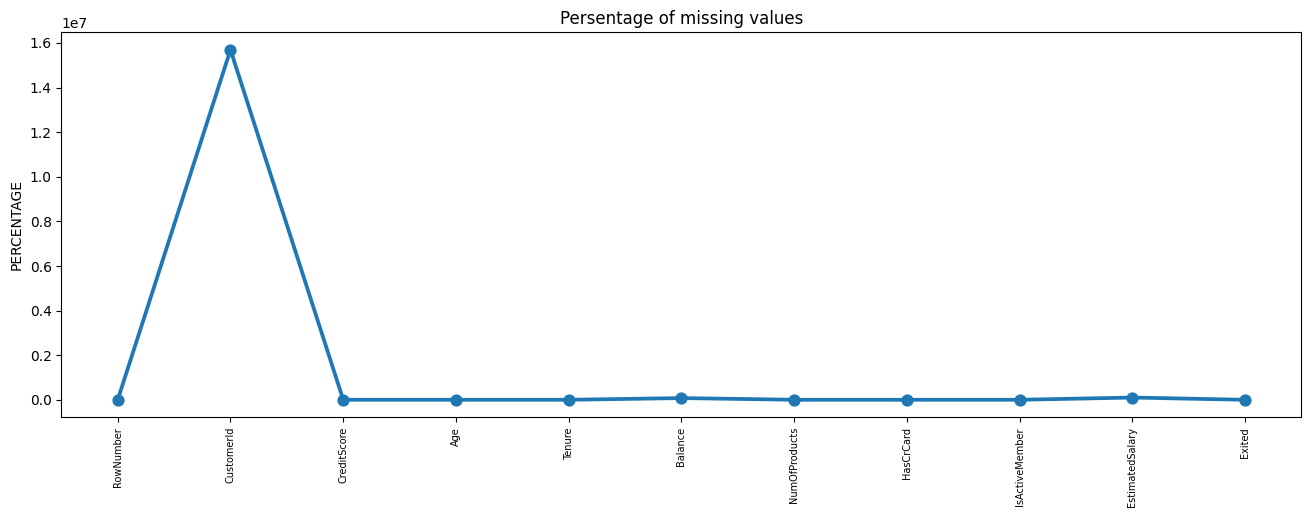

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.pointplot(data=cleaned_df)
plt.xticks(rotation = 90, fontsize = 7)
plt.title("Persentage of missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [10]:
# Check for duplicate Values 
df.duplicated().sum()

2

In [11]:
# Remove the Dublicates
df = df.drop_duplicates(keep='first')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39.0,5,0.00,2,1.0,0.0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35.0,10,57369.61,1,1.0,1.0,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1


In [12]:
df.duplicated().sum()

0

In [13]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
categorical_features = df.select_dtypes(include=["object", "category"]).columns
print("categorical_features", categorical_features)

categorical_features Index(['Surname', 'Geography', 'Gender'], dtype='object')


In [15]:
from sklearn.preprocessing import OneHotEncoder

# Use get_dummies from pandas for simplicity
df_encoded = pd.get_dummies(df, columns=categorical_features)
print(df_encoded)

# Alternatively, using OneHotEncoder from scikit-learn
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Drop original categorical features and concatenate the encoded features
df = df.drop(columns=categorical_features)
df = pd.concat([df, encoded_df], axis=1)
print(df)

       RowNumber  CustomerId  CreditScore   Age  Tenure    Balance  \
0              1    15634602          619  42.0       2       0.00   
1              2    15647311          608  41.0       1   83807.86   
2              3    15619304          502  42.0       8  159660.80   
3              4    15701354          699  39.0       1       0.00   
5              6    15574012          645  44.0       8  113755.78   
...          ...         ...          ...   ...     ...        ...   
9995        9996    15606229          771  39.0       5       0.00   
9996        9997    15569892          516  35.0      10   57369.61   
9997        9998    15584532          709  36.0       7       0.00   
9998        9999    15682355          772  42.0       3   75075.31   
10000      10000    15628319          792  28.0       4  130142.79   

       NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  ...  \
0                  1        1.0             1.0        101348.88  ...   
1            

C:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [16]:
df.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1.0,15634602.0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2.0,15647311.0,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,3.0,15619304.0,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4.0,15701354.0,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,6.0,15574012.0,645.0,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


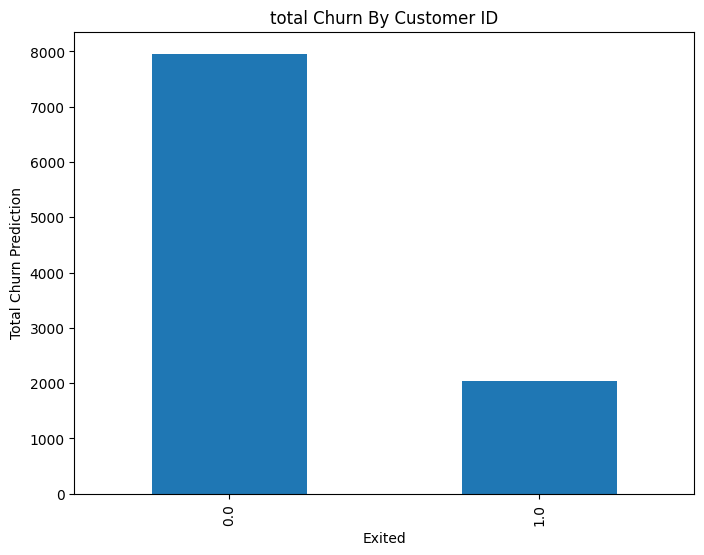

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

df["Exited"].value_counts().plot(kind='bar', figsize=(8,6))
plt.title('total Churn By Customer ID')
plt.xlabel('Exited')
plt.ylabel('Total Churn Prediction')
plt.show()

In [70]:
#100*df['Exited'].value_counts()/len(df['Exited'])

* Data is Highly Imbalance, ratio = 79:20
* So we can Analyse the data with other features while taking the target values seperately to get some insights

## Split Data into Training and Test Data

In [19]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

print("Shape of x_train : " , X_train.shape)
print("Shape of x_test : " , X_test.shape)
print("Shape of y_train : " , y_train.shape)
print("Shape of y_test : " , y_test.shape)

Shape of x_train :  (8000, 2947)
Shape of x_test :  (2000, 2947)
Shape of y_train :  (8000,)
Shape of y_test :  (2000,)


In [21]:
df = df.dropna()

In [23]:
df.isna().sum()

RowNumber            0
CustomerId           0
CreditScore          0
Age                  0
Tenure               0
                    ..
Geography_France     0
Geography_Germany    0
Geography_Spain      0
Gender_Female        0
Gender_Male          0
Length: 2948, dtype: int64

In [24]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

print("Shape of x_train : " , X_train.shape)
print("Shape of x_test : " , X_test.shape)
print("Shape of y_train : " , y_train.shape)
print("Shape of y_test : " , y_test.shape)

Shape of x_train :  (7993, 2947)
Shape of x_test :  (1999, 2947)
Shape of y_train :  (7993,)
Shape of y_test :  (1999,)


In [25]:
df.isna().sum()

RowNumber            0
CustomerId           0
CreditScore          0
Age                  0
Tenure               0
                    ..
Geography_France     0
Geography_Germany    0
Geography_Spain      0
Gender_Female        0
Gender_Male          0
Length: 2948, dtype: int64

### Feature Scalling

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [28]:
X_train[:2]

array([[ 1.36353255,  0.85132775, -1.04297598, ..., -0.57190867,
        -0.89909457,  0.89909457],
       [-0.0749924 , -1.51134003,  0.88424063, ..., -0.57190867,
         1.11223006, -1.11223006]])

In [29]:
sc.mean_

array([4.99617966e+03, 1.56910330e+07, 6.51659952e+02, ...,
       2.46465657e-01, 4.47016139e-01, 5.52983861e-01])

In [30]:
sc.scale_

array([2.89602205e+03, 7.19804965e+04, 9.65122441e+01, ...,
       4.30952825e-01, 4.97184785e-01, 4.97184785e-01])

In [31]:
df.shape

(9992, 2948)

## Training Machine Learning Model

In [32]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

In [33]:
# Evaluate Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_predictions))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, lr_predictions))

Logistic Regression Accuracy: 0.7798899449724862
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1620
         1.0       0.36      0.21      0.26       379

    accuracy                           0.78      1999
   macro avg       0.60      0.56      0.57      1999
weighted avg       0.74      0.78      0.76      1999

Logistic Regression Confusion Matrix:
 [[1481  139]
 [ 301   78]]


In [34]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [35]:
# Evaluate Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))

Random Forest Accuracy: 0.8554277138569285
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92      1620
         1.0       0.78      0.33      0.47       379

    accuracy                           0.86      1999
   macro avg       0.82      0.66      0.69      1999
weighted avg       0.85      0.86      0.83      1999

Random Forest Confusion Matrix:
 [[1584   36]
 [ 253  126]]


In [36]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

In [37]:
# Evaluate Gradient Boosting
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_predictions))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, gb_predictions))
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, gb_predictions))

Gradient Boosting Accuracy: 0.8604302151075538
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      1620
         1.0       0.76      0.38      0.51       379

    accuracy                           0.86      1999
   macro avg       0.82      0.68      0.71      1999
weighted avg       0.85      0.86      0.84      1999

Gradient Boosting Confusion Matrix:
 [[1575   45]
 [ 234  145]]


In [38]:
# Compare the models
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracies = [accuracy_score(y_test, lr_predictions), accuracy_score(y_test, rf_predictions), accuracy_score(y_test, gb_predictions)]

In [39]:
# Print the model comparison
for model, accuracy in zip(models, accuracies):
    print(f"{model}: {accuracy:.4f}")

Logistic Regression: 0.7799
Random Forest: 0.8554
Gradient Boosting: 0.8604


In [40]:
# Save the best model
best_model_index = accuracies.index(max(accuracies))
best_model = [lr_model, rf_model, gb_model][best_model_index]
best_model_name = models[best_model_index]

In [42]:
# Save the best model and the scaler
joblib.dump(best_model, f'{best_model_name}_model.pkl')

['Gradient Boosting_model.pkl']